In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import entropy
import itertools as itr
import numpy as np
from scipy.special import factorial

In [2]:
def multinomial(ks):
    return factorial(sum(ks))/np.prod([factorial(k) for k in ks])

In [3]:
N = 50  # length of sequence
M = 3  # size of alphabet

# inefficient way of generating types :(
counts = set(c for c in itr.permutations(list(range(N + 1)) * M, M) if sum(c) == N)
types = np.array([np.array(c)/N for c in counts])
nsequences = np.array([multinomial(c) for c in counts])
print(sum(nsequences))
print(M**N)

7.178979876918519e+23
717897987691852588770249


## Helper functions for plotting on the simplex

In [4]:
def plot_simplex_bounds():
    plt.plot([0, 1], [0, 0], color='k', alpha=.5)
    plt.plot([0, .5], [0, 1], color='k', alpha=.5)
    plt.plot([.5, 1], [1, 0], color='k', alpha=.5)
    plt.axis('off');

In [5]:
def type2simplex(t):
    return np.array([t[2] + .5*t[1], t[1]])

In [6]:
simplex = np.array([type2simplex(t) for t in types])

## Number of sequences of each type

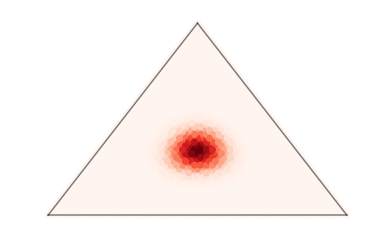

In [7]:
plot_simplex_bounds()

plt.scatter(simplex[:, 0], simplex[:, 1], c=nsequences, cmap='Reds');

# Given generating sequence $p_k$

In [8]:
pk = [1/2, 1/4, 1/4]
s = type2simplex(pk)
divergences = np.array([entropy(t, pk) for t in types])
entropies = np.array([entropy(t) for t in types])

## Divergence of each type from $p_k$

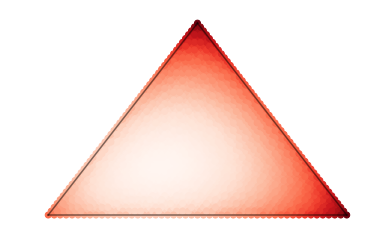

In [9]:
plot_simplex_bounds()
plt.scatter(simplex[:, 0], simplex[:, 1], c=divergences, cmap='Reds')
# plt.scatter(s[0], s[1], marker='x');

## Total probability of each type under $p_k$

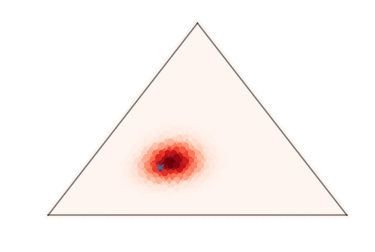

In [10]:
plot_simplex_bounds()
plt.scatter(simplex[:, 0], simplex[:, 1], c=2**-(N*divergences + N*entropies)*nsequences, cmap='Reds')
plt.scatter(s[0], s[1], marker='x');

## Upper bound on total probability of each type under $p_k$

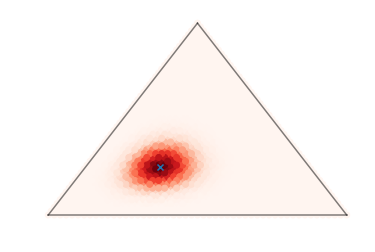

In [11]:
plot_simplex_bounds()
plt.scatter(simplex[:, 0], simplex[:, 1], c=2**-(N*divergences), cmap='Reds')
plt.scatter(s[0], s[1], marker='x');

# Types with $p_3 \geq .5$

In [12]:
ix = types[:, 2] >= .5

Number of sequences

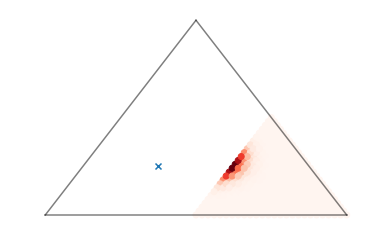

In [13]:
plot_simplex_bounds()
plt.scatter(simplex[:, 0][ix], simplex[:, 1][ix], c=nsequences[ix], cmap='Reds');
plt.scatter(s[0], s[1], marker='x');

Probability of each type class

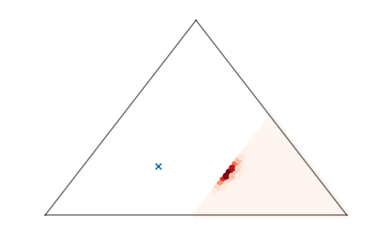

In [14]:
plot_simplex_bounds()
plt.scatter(simplex[:, 0][ix], simplex[:, 1][ix], c=2**-(N*divergences[ix] + entropies[ix])*nsequences[ix], cmap='Reds');
plt.scatter(s[0], s[1], marker='x');

Upper bound on probability of type class

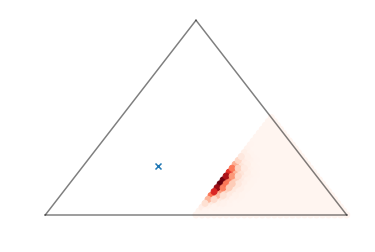

In [15]:
plot_simplex_bounds()
plt.scatter(simplex[:, 0][ix], simplex[:, 1][ix], c=2**-(N*divergences[ix]), cmap='Reds');
plt.scatter(s[0], s[1], marker='x');